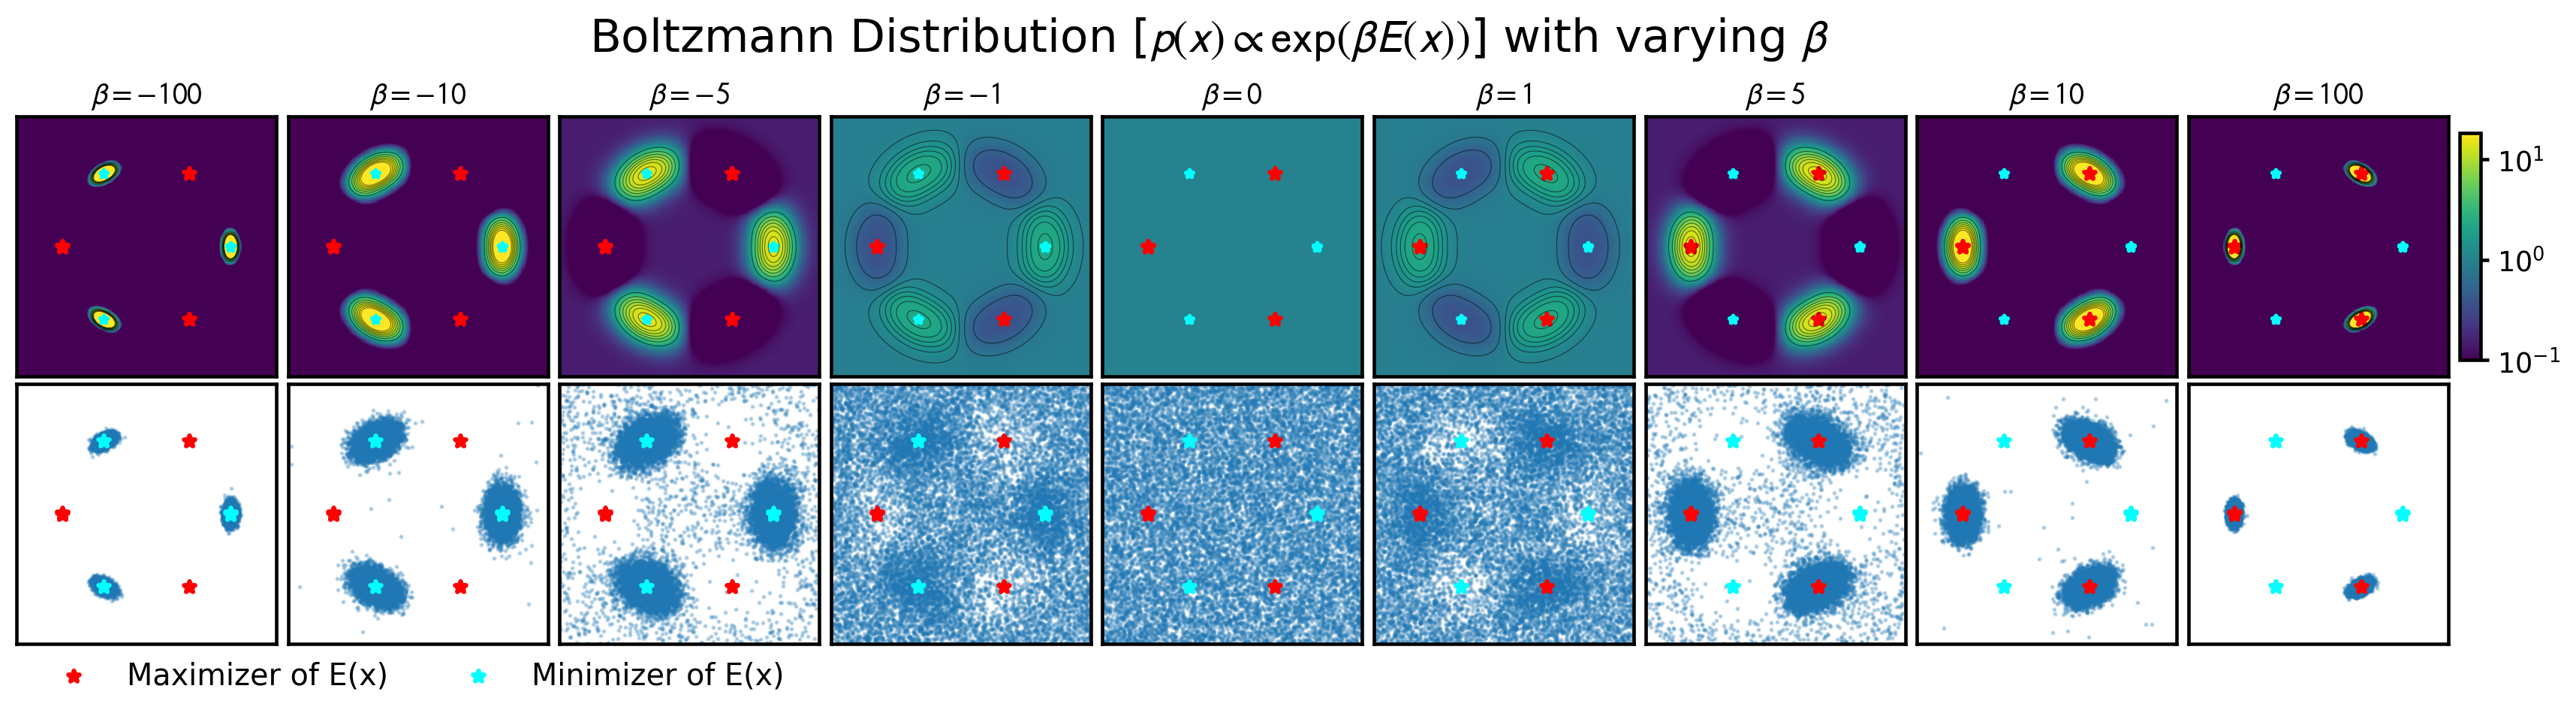

Visualization: cmap=turbo (under=black, over=white), PowerNorm gamma=0.45, vmax≈1.815e+01 (global 99.3%)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm, SymLogNorm
from matplotlib.colors import LogNorm, PowerNorm
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import maximum_filter, minimum_filter # Needed for peak detection
# plt.rcParams.update({
#     "font.family": "sans-serif",
#     # This forces Matplotlib to use the internal Computer Modern fonts
#     "mathtext.fontset": "cm", 
#     # "font.sans-serif": ["Computer Modern Sans Serif"], 
# })
def U_flower_ring_unit(X, Y, m=3, r0=0.65, sr=0.12, alpha=1.6):
    x = 2.0 * (X - 0.5)
    y = 2.0 * (Y - 0.5)
    r = np.hypot(x, y)
    theta = np.arctan2(y, x)
    ring = np.exp(-0.5 * ((r - r0) / sr) ** 2)
    petals = np.cos(m * theta)
    return -np.tanh(alpha * (ring * petals))

def logsumexp_np(a):
    m = np.max(a)
    return m + np.log(np.sum(np.exp(a - m)))

def normalized_pdf_on_grid(U, beta, dx, dy):
    log_unnorm = beta * U
    logZ = logsumexp_np(log_unnorm) + np.log(dx * dy)
    return np.exp(log_unnorm - logZ)

# Grid
n = 320
xs = np.linspace(0.0, 1.0, n)
ys = np.linspace(0.0, 1.0, n)
X, Y = np.meshgrid(xs, ys, indexing="xy")
dx = (xs[-1] - xs[0]) / (n - 1)
dy = (ys[-1] - ys[0]) / (n - 1)

U = U_flower_ring_unit(X, Y)
local_max_mask = (maximum_filter(U, size=20) == U)[1:-1]
local_min_mask = (minimum_filter(U, size=20) == U)[1:-1]
max_x, max_y = X[1:-1][local_max_mask], Y[1:-1][local_max_mask]
min_x, min_y = X[1:-1][local_min_mask], Y[1:-1][local_min_mask]
betas = np.array([-100.0, -10.0, -5.0, -1.0, 0.0, 1.0, 5.0, 10.0, 100.0])
pdfs = [normalized_pdf_on_grid(U, b, dx, dy) for b in betas]

all_vals = np.concatenate([p.ravel() for p in pdfs])
vmax = np.percentile(all_vals, 99.3)
vmin = 0.1
gamma = 0.45
norm = PowerNorm(gamma=gamma, vmin=vmin, vmax=vmax)
norm = LogNorm(vmin=vmin, vmax=vmax)
norm = SymLogNorm(vmin=vmin, vmax=vmax, linthresh=0.015)

cmap = cm.viridis.copy()
cmap.set_under("black")
cmap.set_over("white")

fig = plt.figure(figsize=(2.05*len(betas) + 0.8, 4.2), dpi=220)
gs = fig.add_gridspec(2, len(betas) + 1, width_ratios=[1]*len(betas) + [0.08], wspace=0.05, hspace=0.00)

axes_row1 = [fig.add_subplot(gs[0, i]) for i in range(len(betas))]
axes_row2 = [fig.add_subplot(gs[1, i]) for i in range(len(betas))]
container = fig.add_subplot(gs[0, len(betas)])
container.set_axis_off()  # Hide the container's borders/ticks
cax = inset_axes(container, width="100%", height="85%", loc='center')

for ax, b, p in zip(axes_row1, betas, pdfs):
    p_vis = np.clip(p, vmin, vmax)
    im = ax.imshow(
        p_vis, origin="lower", extent=(0, 1, 0, 1), aspect="equal",
        cmap=cmap, norm=norm, interpolation="nearest",
    )
    ax.contour(X, Y, p_vis, levels=8, linewidths=0.35, colors="k", alpha=0.55, antialiased=True, )
    h_max = ax.scatter(max_x, max_y, s=25, c='red', marker='*', edgecolors='red', linewidth=2., label='Maximizer of E(x)')
    h_min = ax.scatter(min_x, min_y, s=10, c='cyan', marker='*', edgecolors='cyan', linewidth=2.,label="Minimizer of E(x)")
    ax.set_title(f"$\\beta={b:g}$", fontsize=13, y=1)
    ax.set_xticks([])
    ax.set_yticks([])
for ax, b, p in zip(axes_row2, betas, pdfs):
    x_loaded = np.load(f'files/gmm_samples_beta={int(b)}.npy')
    ax.scatter(x_loaded[:, 0], x_loaded[:, 1], s=1, alpha=0.25)
    h_max = ax.scatter(max_x, max_y, s=25, c='red', marker='*', edgecolors='red', linewidth=2., label='Maximizer of E(x)')
    h_min = ax.scatter(min_x, min_y, s=25, c='cyan', marker='*', edgecolors='cyan', linewidth=2.,label="Minimizer of E(x)")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

cb = fig.colorbar(im, cax=cax)#, extend="both")
# cb.set_label(f"pβ(z) (PowerNorm γ={gamma}, vmax@99.3% clip)", fontsize=9)
fig.legend(handles=[h_max, h_min], loc='upper center', 
           bbox_to_anchor=(.25, .13), ncol=2, frameon=False, fontsize=13)
fig.suptitle(r"Boltzmann Distribution [$p(x) \propto \exp(\beta E(x))$] with varying $\beta$", y=1.02, fontsize=20)
plt.show()

print(f"Visualization: cmap=turbo (under=black, over=white), PowerNorm gamma={gamma}, vmax≈{vmax:.3e} (global 99.3%)")


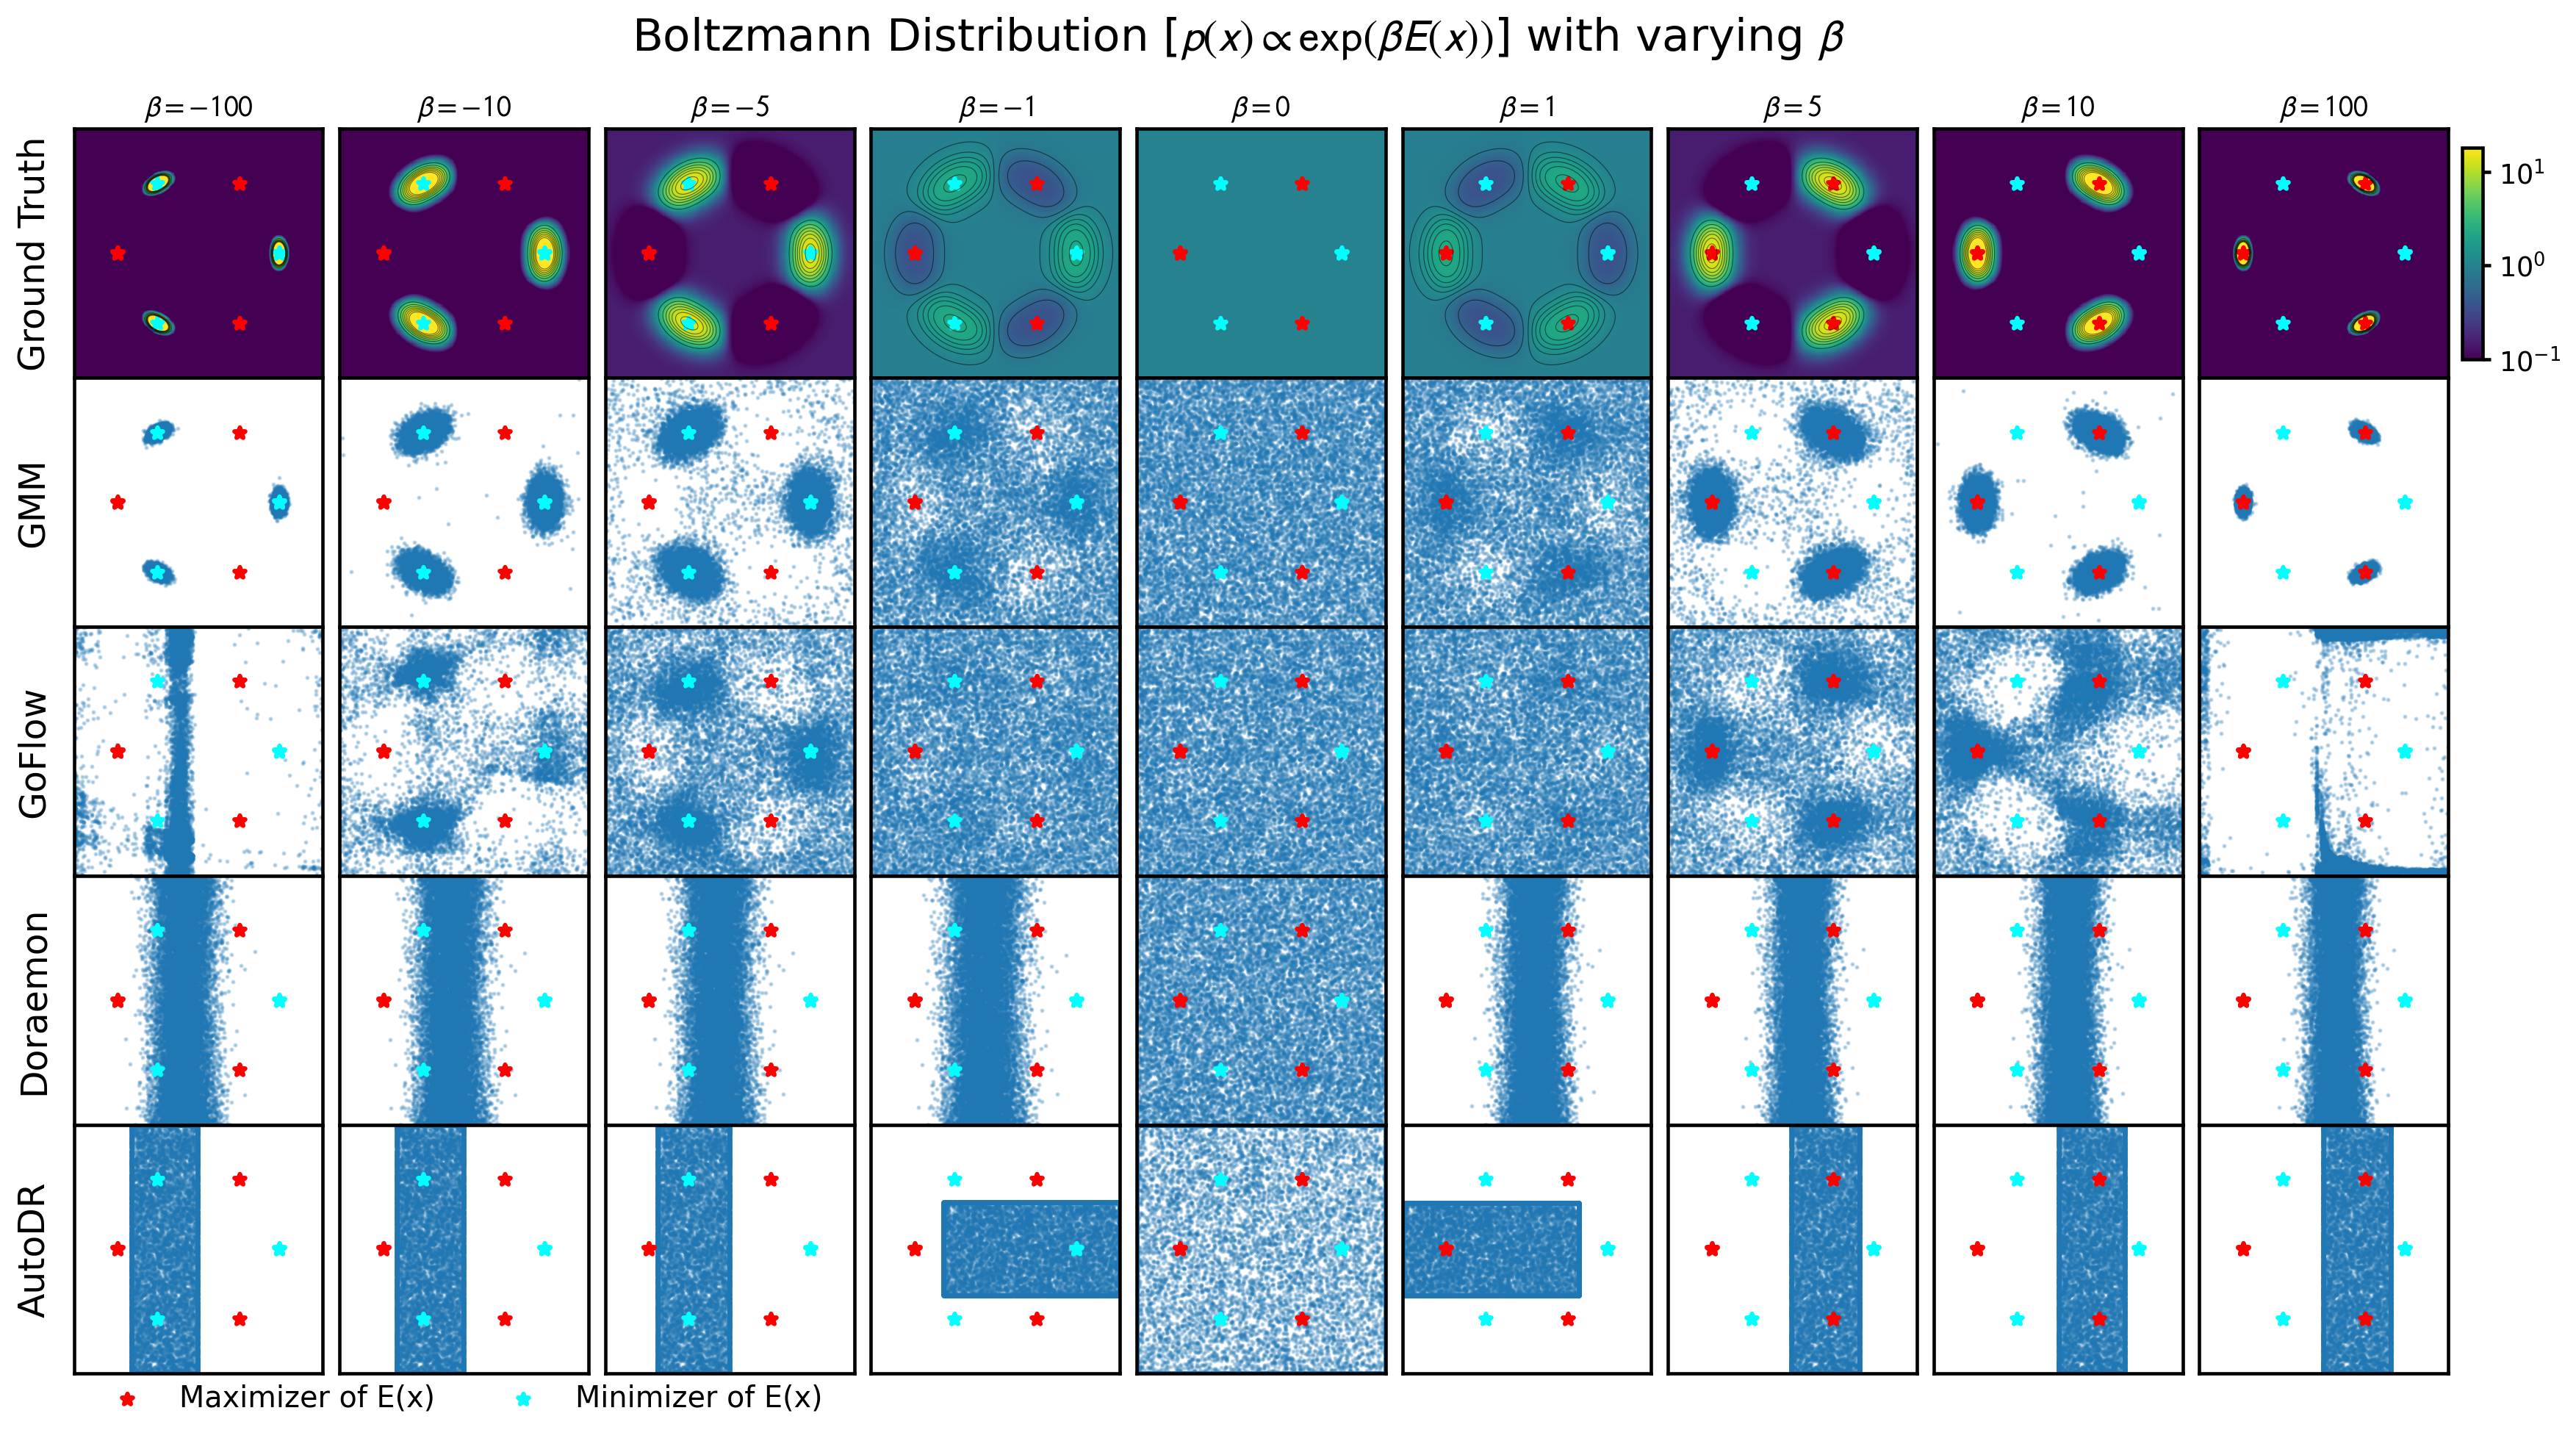

Visualization: cmap=turbo (under=black, over=white), PowerNorm gamma=0.45, vmax≈1.815e+01 (global 99.3%)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm, SymLogNorm
from matplotlib.colors import LogNorm, PowerNorm
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import maximum_filter, minimum_filter # Needed for peak detection
# plt.rcParams.update({
#     "font.family": "sans-serif",
#     # This forces Matplotlib to use the internal Computer Modern fonts
#     "mathtext.fontset": "cm", 
#     # "font.sans-serif": ["Computer Modern Sans Serif"], 
# })
def U_flower_ring_unit(X, Y, m=3, r0=0.65, sr=0.12, alpha=1.6):
    x = 2.0 * (X - 0.5)
    y = 2.0 * (Y - 0.5)
    r = np.hypot(x, y)
    theta = np.arctan2(y, x)
    ring = np.exp(-0.5 * ((r - r0) / sr) ** 2)
    petals = np.cos(m * theta)
    return -np.tanh(alpha * (ring * petals))

def logsumexp_np(a):
    m = np.max(a)
    return m + np.log(np.sum(np.exp(a - m)))

def normalized_pdf_on_grid(U, beta, dx, dy):
    log_unnorm = beta * U
    logZ = logsumexp_np(log_unnorm) + np.log(dx * dy)
    return np.exp(log_unnorm - logZ)

# Grid
n = 320
xs = np.linspace(0.0, 1.0, n)
ys = np.linspace(0.0, 1.0, n)
X, Y = np.meshgrid(xs, ys, indexing="xy")
dx = (xs[-1] - xs[0]) / (n - 1)
dy = (ys[-1] - ys[0]) / (n - 1)

U = U_flower_ring_unit(X, Y)
local_max_mask = (maximum_filter(U, size=20) == U)[1:-1]
local_min_mask = (minimum_filter(U, size=20) == U)[1:-1]
max_x, max_y = X[1:-1][local_max_mask], Y[1:-1][local_max_mask]
min_x, min_y = X[1:-1][local_min_mask], Y[1:-1][local_min_mask]
betas = np.array([-100.0, -10.0, -5.0, -1.0, 0.0, 1.0, 5.0, 10.0, 100.0])
pdfs = [normalized_pdf_on_grid(U, b, dx, dy) for b in betas]

all_vals = np.concatenate([p.ravel() for p in pdfs])
vmax = np.percentile(all_vals, 99.3)
vmin = 0.1
gamma = 0.45
norm = PowerNorm(gamma=gamma, vmin=vmin, vmax=vmax)
norm = LogNorm(vmin=vmin, vmax=vmax)
norm = SymLogNorm(vmin=vmin, vmax=vmax, linthresh=0.015)

cmap = cm.viridis.copy()
cmap.set_under("black")
cmap.set_over("white")

fig = plt.figure(figsize=(2.05*len(betas) + 0.8, 10.), dpi=220)
gs = fig.add_gridspec(5, len(betas) + 1, width_ratios=[1]*len(betas) + [0.08], wspace=0.05, hspace=0.00)

axes_row1 = [fig.add_subplot(gs[0, i]) for i in range(len(betas))]
axes_row2 = [fig.add_subplot(gs[1, i]) for i in range(len(betas))]
axes_row3 = [fig.add_subplot(gs[2, i]) for i in range(len(betas))]
axes_row4 = [fig.add_subplot(gs[3, i]) for i in range(len(betas))]
axes_row5 = [fig.add_subplot(gs[4, i]) for i in range(len(betas))]
container = fig.add_subplot(gs[0, len(betas)])
container.set_axis_off()  # Hide the container's borders/ticks
cax = inset_axes(container, width="100%", height="85%", loc='center')
row_labels = ["Ground Truth", "GMM", "GoFlow", "Doraemon", "AutoDR"]
row_axes_list = [axes_row1, axes_row2, axes_row3, axes_row4, axes_row5]
# plt.subplots_adjust(left=0.05)
for axes_row, label in zip(row_axes_list, row_labels):
    # Get the first axis in the row
    ax = axes_row[0]
    
    # Set the label
    # rotation=90 makes it vertical (standard for scientific plots)
    # rotation=0 would make it horizontal (easier to read but takes more width)
    ax.set_ylabel(label, rotation=90, fontsize=16, labelpad=10)
for ax, b, p in zip(axes_row1, betas, pdfs):
    p_vis = np.clip(p, vmin, vmax)
    im = ax.imshow(
        p_vis, origin="lower", extent=(0, 1, 0, 1), aspect="equal",
        cmap=cmap, norm=norm, interpolation="nearest",
    )
    ax.contour(X, Y, p_vis, levels=8, linewidths=0.35, colors="k", alpha=0.55, antialiased=True, )
    h_max = ax.scatter(max_x, max_y, s=25, c='red', marker='*', edgecolors='red', linewidth=2., label='Maximizer of E(x)')
    h_min = ax.scatter(min_x, min_y, s=25, c='cyan', marker='*', edgecolors='cyan', linewidth=2.,label="Minimizer of E(x)")
    ax.set_title(f"$\\beta={b:g}$", fontsize=13, y=1)
    ax.set_xticks([])
    ax.set_yticks([])
for ax, b, p in zip(axes_row2, betas, pdfs):
    x_loaded = np.load(f'files/gmm_samples_beta={int(b)}.npy')
    ax.scatter(x_loaded[:, 0], x_loaded[:, 1], s=1, alpha=0.25)
    h_max = ax.scatter(max_x, max_y, s=25, c='red', marker='*', edgecolors='red', linewidth=2., label='Maximizer of E(x)')
    h_min = ax.scatter(min_x, min_y, s=25, c='cyan', marker='*', edgecolors='cyan', linewidth=2.,label="Minimizer of E(x)")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
for ax, b, p in zip(axes_row3, betas, pdfs):
    x_loaded = np.load(f'files/ns_samples_beta={int(b)}.npy')
    ax.scatter(x_loaded[:, 0], x_loaded[:, 1], s=1, alpha=0.25)
    h_max = ax.scatter(max_x, max_y, s=25, c='red', marker='*', edgecolors='red', linewidth=2., label='Maximizer of E(x)')
    h_min = ax.scatter(min_x, min_y, s=25, c='cyan', marker='*', edgecolors='cyan', linewidth=2.,label="Minimizer of E(x)")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
for ax, b, p in zip(axes_row4, betas, pdfs):
    x_loaded = np.load(f'files/doraemon_samples_beta={int(b)}.npy')
    ax.scatter(x_loaded[:, 0], x_loaded[:, 1], s=1, alpha=0.25)
    h_max = ax.scatter(max_x, max_y, s=25, c='red', marker='*', edgecolors='red', linewidth=2., label='Maximizer of E(x)')
    h_min = ax.scatter(min_x, min_y, s=25, c='cyan', marker='*', edgecolors='cyan', linewidth=2.,label="Minimizer of E(x)")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
for ax, b, p in zip(axes_row5, betas, pdfs):
    x_loaded = np.load(f'files/autodr_samples_beta={int(b)}.npy')
    ax.scatter(x_loaded[:, 0], x_loaded[:, 1], s=1, alpha=0.25)
    h_max = ax.scatter(max_x, max_y, s=25, c='red', marker='*', edgecolors='red', linewidth=2., label='Maximizer of E(x)')
    h_min = ax.scatter(min_x, min_y, s=25, c='cyan', marker='*', edgecolors='cyan', linewidth=2.,label="Minimizer of E(x)")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
cb = fig.colorbar(im, cax=cax)#, extend="both")
# cb.set_label(f"pβ(z) (PowerNorm γ={gamma}, vmax@99.3% clip)", fontsize=9)
fig.legend(handles=[h_max, h_min], loc='upper center', 
           bbox_to_anchor=(.25, .12), ncol=2, frameon=False, fontsize=13)
fig.suptitle(r"Boltzmann Distribution [$p(x) \propto \exp(\beta E(x))$] with varying $\beta$", y=.95, fontsize=20)
plt.show()

print(f"Visualization: cmap=turbo (under=black, over=white), PowerNorm gamma={gamma}, vmax≈{vmax:.3e} (global 99.3%)")


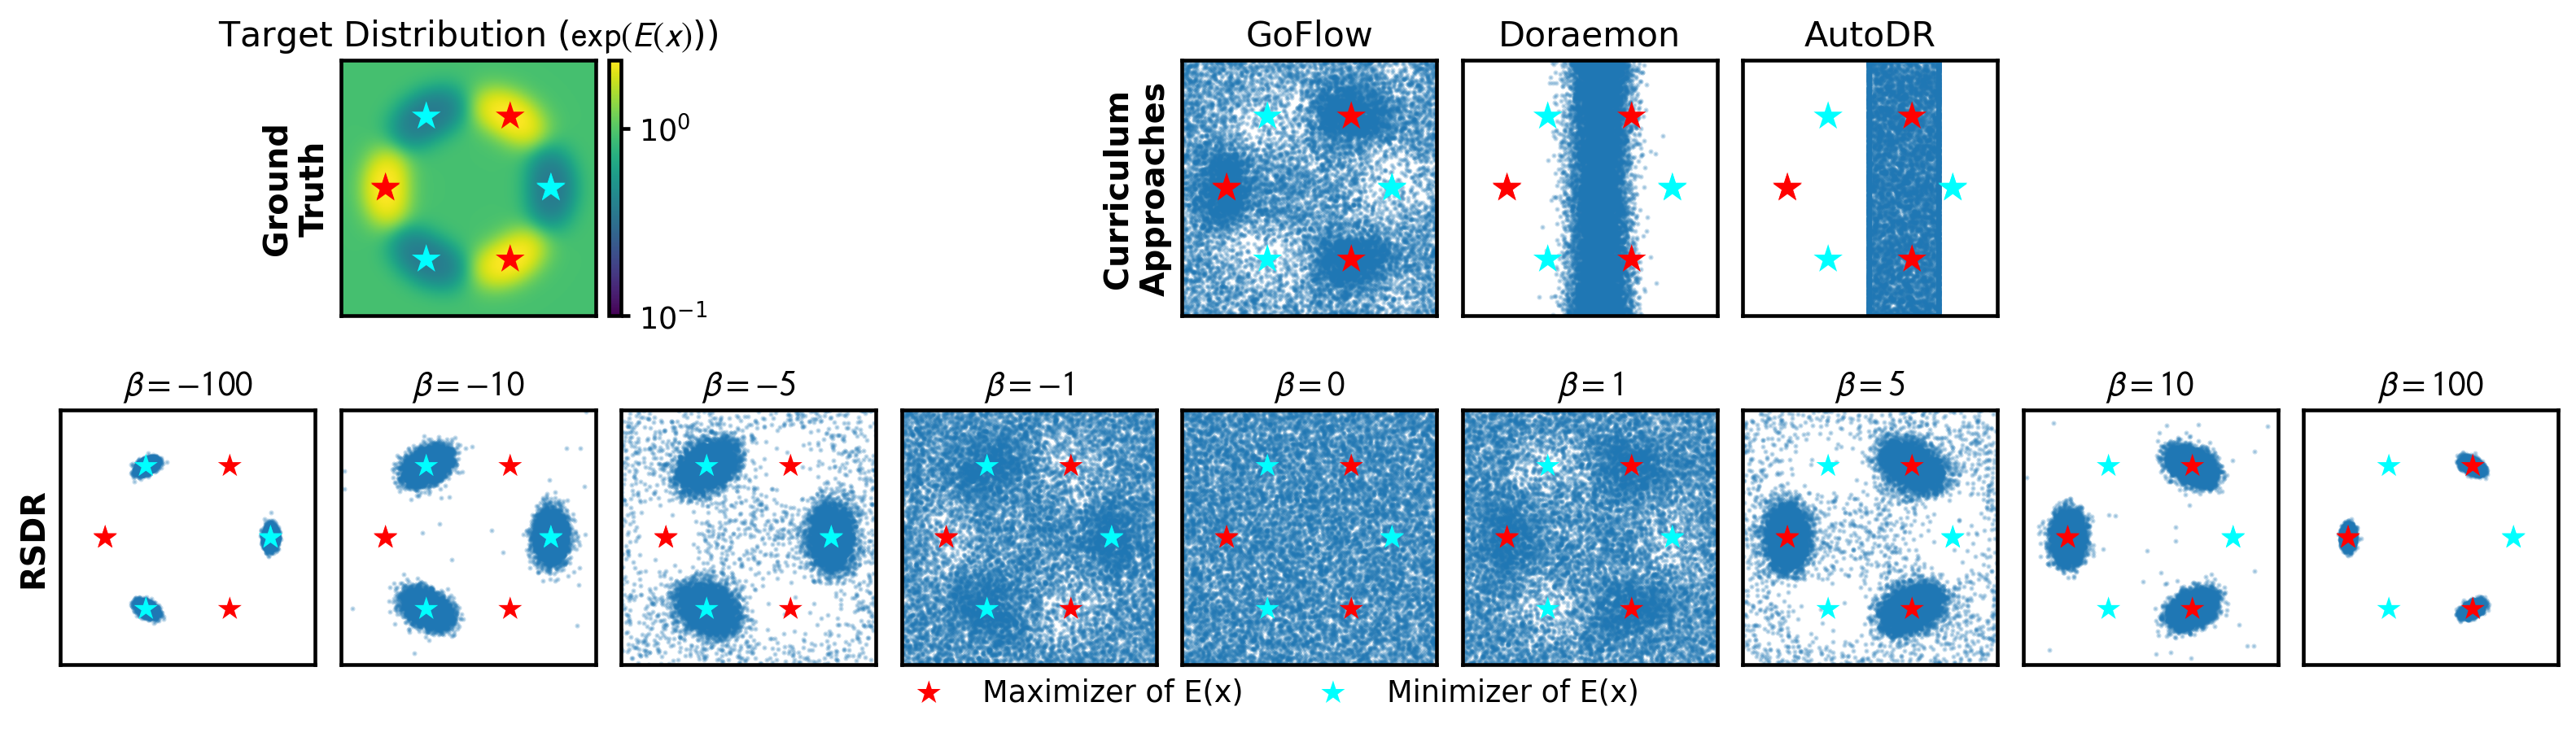

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import maximum_filter, minimum_filter

# ... (U_flower_ring_unit and normalized_pdf_on_grid functions remain the same) ...

# 1. Setup Data
n = 320
xs = np.linspace(0.0, 1.0, n); ys = np.linspace(0.0, 1.0, n)
X, Y = np.meshgrid(xs, ys, indexing="xy")
U = U_flower_ring_unit(X, Y)

local_max_mask = (maximum_filter(U, size=20) == U)[1:-1]
local_min_mask = (minimum_filter(U, size=20) == U)[1:-1]
max_x, max_y = X[1:-1][local_max_mask], Y[1:-1][local_max_mask]
min_x, min_y = X[1:-1][local_min_mask], Y[1:-1][local_min_mask]

betas = np.array([-100.0, -10.0, -5.0, -1.0, 0.0, 1.0, 5.0, 10.0, 100.0])

# 2. Setup Figure - 2 main content rows to save significant space
fig = plt.figure(figsize=(18, 5), dpi=220)
# Use a grid where the top row is partitioned for both GT and Curriculum models
gs = fig.add_gridspec(2, len(betas), wspace=0.1, hspace=0.03, height_ratios=[1, 1])

def plot_samples(ax, data_path, title=None, ylabel=None, marker_size=150):
    try:
        x_loaded = np.load(data_path)
        ax.scatter(x_loaded[:, 0], x_loaded[:, 1], s=1, alpha=0.25, color='tab:blue', rasterized=True)
    except FileNotFoundError:
        ax.text(0.5, 0.5, f"Missing:\n{data_path.split('/')[-1]}", ha='center', va='center', fontsize=8)
    
    # Using the larger s=150 as requested for better visibility
    h_max = ax.scatter(max_x, max_y, s=marker_size, c='red', marker='*', edgecolors='none', zorder=5)
    h_min = ax.scatter(min_x, min_y, s=marker_size, c='cyan', marker='*', edgecolors='none', zorder=5)
    
    ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([]); ax.set_yticks([])
    if title: ax.set_title(title, fontsize=14)
    if ylabel: ax.set_ylabel(ylabel, fontsize=13, fontweight='bold')
    return h_max, h_min

# --- Row 1, Part A: Ground Truth (Positioned at index 1 for some leading space) ---
ax_gt = fig.add_subplot(gs[0, 1])
pdf_beta1 = normalized_pdf_on_grid(U, 1.0, 1/319, 1/319)
norm = SymLogNorm(vmin=0.1, vmax=pdf_beta1.max(), linthresh=0.015)
im = ax_gt.imshow(pdf_beta1, origin="lower", extent=(0, 1, 0, 1), cmap='viridis', norm=norm)

# Larger markers on GT
ax_gt.scatter(max_x, max_y, s=150, c='red', marker='*', edgecolors='none', zorder=5)
ax_gt.scatter(min_x, min_y, s=150, c='cyan', marker='*', edgecolors='none', zorder=5)

# Colorbar (compact inset)
cax = inset_axes(ax_gt, width="5%", height="100%", loc='lower left',
                 bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax_gt.transAxes, borderpad=0)
fig.colorbar(im, cax=cax)

ax_gt.set_title(r"Target Distribution ($\exp(E(x)$))", fontsize=14)
ax_gt.set_ylabel("Ground\nTruth", fontsize=13, fontweight='bold')
ax_gt.set_xticks([]); ax_gt.set_yticks([])

# --- Row 1, Part B: Curriculum Approaches (Positioned with an interval at indices 4, 5, 6) ---
curriculum_indices = [4, 5, 6]
spec_configs = [("GoFlow", "ns"), ("Doraemon", "doraemon"), ("AutoDR", "autodr")]

for i, (col_idx, (label, prefix)) in enumerate(zip(curriculum_indices, spec_configs)):
    ax = fig.add_subplot(gs[0, col_idx])
    plot_samples(ax, f'files/{prefix}_samples_beta=5.npy', title=fr"{label}", marker_size=150)
    if i == 0:
        ax.set_ylabel("Curriculum\nApproaches", fontsize=13, fontweight='bold')

# --- Row 2: RSDR Sweep (Full width) ---
for i, b in enumerate(betas):
    ax = fig.add_subplot(gs[1, i])
    ylabel = "RSDR" if i == 0 else None
    h_max, h_min = plot_samples(ax, f'files/gmm_samples_beta={int(b)}.npy', 
                                title=fr"$\beta={b:g}$", ylabel=ylabel, marker_size=100)

# Final formatting
fig.legend(handles=[h_max, h_min], labels=['Maximizer of E(x)', 'Minimizer of E(x)'], 
           loc='lower center', bbox_to_anchor=(0.5, 0.08), ncol=2, frameon=False, fontsize=12)

plt.show()


<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:69: SyntaxWarning: invalid escape sequence '\p'
<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:69: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1909265/359501884.py:68: SyntaxWarning: invalid escape sequence '\p'
  ax_energy.set_ylabel("Expected Return $J_{\pi}$", fontsize=14, fontweight='bold')
/tmp/ipykernel_1909265/359501884.py:69: SyntaxWarning: invalid escape sequence '\p'
  ax_energy.set_title("Return $J_{\pi}$ Landscape ", fontsize=16, pad=15)


AttributeError: module 'numpy' has no attribute 'trapz'

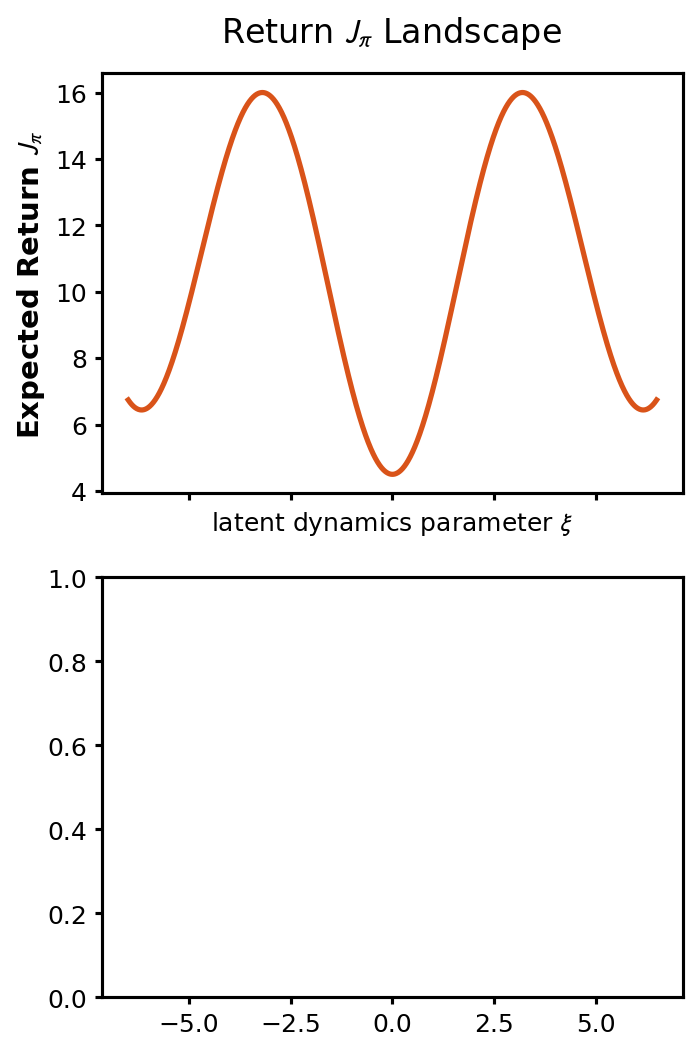

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# --- 1. Setup Natural Sans-Serif Fonts ---
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "mathtext.fontset": "stixsans",
    "font.size": 12,
    "axes.linewidth": 1.5,
    "xtick.major.width": 1.5,
    "ytick.major.width": 1.5,
})

# --- 2. Define the "Many Well" Energy Function ---
def rugged_energy_1d(x, k_bowl=.1, A_wiggle=5.5, freq_wiggle=1.0):
    """
    Combines a quadratic bowl with a cosine wiggle.
    E(x) = 0.5 * k * x^2 - A * cos(freq * x)
    """
    bowl = 0.5 * k_bowl * x**2
    wiggle = -A_wiggle * np.cos(freq_wiggle * x)
    return bowl + wiggle + 10

# --- 3. Define Gibbs Distribution Calculation ---
def compute_gibbs_pdf(E_vals, beta, dx):
    """Computes p(x) = exp(E(x)) / Z"""
    # 1. Compute unnormalized probabilities (Boltzmann factor)
    # Subtract min(E) for numerical stability to avoid overflow/underflow
    unnormalized_p = np.exp(beta*(E_vals - np.min(E_vals)))
    
    # 2. Compute Partition Function Z (integral approx using trapezoidal rule)
    Z = np.trapz(unnormalized_p, dx=dx)
    
    # 3. Normalize
    return unnormalized_p / Z

# --- 4. Generate Data ---
# Create grid
x_min, x_max = -6.5, 6.5
n_points = 2000 # High resolution for smooth peaks
x = np.linspace(x_min, x_max, n_points)
dx = x[1] - x[0]

# Compute Energy and Probability
E_vals = rugged_energy_1d(x)
# 2. Plot Distributions (Primary Axis)


# --- 5. Find Energy Minima (Wells) for highlighting ---
# Find indices where E(x) is a local minimum
minima_indices = argrelextrema(E_vals, np.less)[0]
x_minima = x[minima_indices]
E_minima = E_vals[minima_indices]


# --- 6. Visualization ---
# Create 2 subplots sharing the X axis
plt.close()
fig, (ax_energy, ax_prob) = plt.subplots(2, 1, figsize=(5, 8), sharex=True, dpi=150)

# --- Top Plot: Energy E(x) ---
ax_energy.plot(x, E_vals, color='#D95319', linewidth=2.5, label='$E(x)$')
# Mark the wells
# ax_energy.scatter(x_minima, E_minima, color='black', s=60, zorder=5, label='Energy Wells (Minima)')

ax_energy.set_ylabel("Expected Return $J_{\pi}$", fontsize=14, fontweight='bold')
ax_energy.set_title("Return $J_{\pi}$ Landscape ", fontsize=16, pad=15)
# ax_energy.grid(True, linestyle='--', alpha=0.6)
ax_energy.set_xlabel("latent dynamics parameter $\\xi$ ")
# ax_energy.legend(loc='upper center', frameon=False)

# --- Bottom Plot: Gibbs Distribution p(x) ---
# Use fill_between for a nice probability density look
colors = ['#D32F2F', '#FF7043', '#599468', '#42A5F5', '#1976D2']
betas = [-5., -1, 0, 1 , 5.0]
for beta, color in zip(betas, colors):
    p = compute_gibbs_pdf(E_vals, beta, dx)
    ax_prob.plot(x, p, linewidth=2.5, color=color, label=f'$\\beta = {beta}$')
# ax_prob.fill_between(x, p, color='#0072BD', alpha=0.4)
# ax_prob.plot(x, p_vals, color='#0072BD', linewidth=2.5, label='$p(x) \propto \exp(-E(x))$')

ax_prob.set_ylabel("Boltzmann Distribution $\\nu_\\beta(x)$", fontsize=12)
ax_prob.set_xlabel("latent dynamics parameter $\\xi$", fontsize=14)
ax_prob.set_title("The resulting Gibbs Distribution", fontsize=16, pad=15)
ax_prob.grid(True, linestyle='--', alpha=0.6)
ax_prob.legend(loc='upper right', frameon=False)
ax_prob.set_ylim(bottom=0) # Probability cannot be negative

# --- Connecting Lines ---
# Draw vertical dashed lines connecting the energy wells to probability peaks
# for x_pos in x_minima:
#     # Draw line across both axes
#     fig.add_artist(plt.Line2D([x_pos, x_pos], [0.05, 0.93], transform=fig.transFigure, 
#                               color='gray', linestyle=':', linewidth=1.5, alpha=0.5, zorder=-1))

plt.tight_layout()
# Adjust layout to make room for the connecting lines drawn in figure coords
# plt.subplots_adjust(hspace=0.3) 
plt.show()
